### 📦 Install and import required libraries.

In [3]:
# Install libraries
!pip install -q kagglehub scikit-learn pandas seaborn matplotlib

import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import joblib

print("✅ Libraries loaded successfully.")


✅ Libraries loaded successfully.


### **⬇️ Download dataset automatically using KaggleHub.**

In [4]:
# Download the dataset from Kaggle using KaggleHub
dataset_path = kagglehub.dataset_download("ninzaami/loan-predication")

print("📂 Dataset downloaded successfully!")
print("Path:", dataset_path)


100%|██████████| 7.83k/7.83k [00:00<00:00, 13.8MB/s]

Extracting files...
📂 Dataset downloaded successfully!
Path: /root/.cache/kagglehub/datasets/ninzaami/loan-predication/versions/1


### **📂 Load dataset and view first few rows.**

In [5]:
# Load the CSV file from the downloaded dataset
import os, glob

csv_files = glob.glob(os.path.join(dataset_path, "*.csv"))
if csv_files:
    df = pd.read_csv(csv_files[0])
    print("✅ Dataset loaded:", csv_files[0])
else:
    raise FileNotFoundError("❌ No CSV found in the dataset folder.")

df.head()


✅ Dataset loaded: /root/.cache/kagglehub/datasets/ninzaami/loan-predication/versions/1/train_u6lujuX_CVtuZ9i (1).csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### **🔍 Check shape, columns, and missing values.**

In [6]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
df.describe()


Shape: (614, 13)

Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Missing values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### **🧹 Clean data — fill missing values and drop nulls.**

In [7]:
# Handle missing values
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Drop rows with any remaining nulls
df.dropna(inplace=True)

print("✅ Missing values cleaned.")


✅ Missing values cleaned.


/tmp/ipython-input-1732041593.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
/tmp/ipython-input-1732041593.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

### **🔠 Encode categorical columns with LabelEncoder.**

In [8]:
# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

print("✅ Categorical features encoded.")
df.head()


✅ Categorical features encoded.


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### **📊 View correlation heatmap between features.**

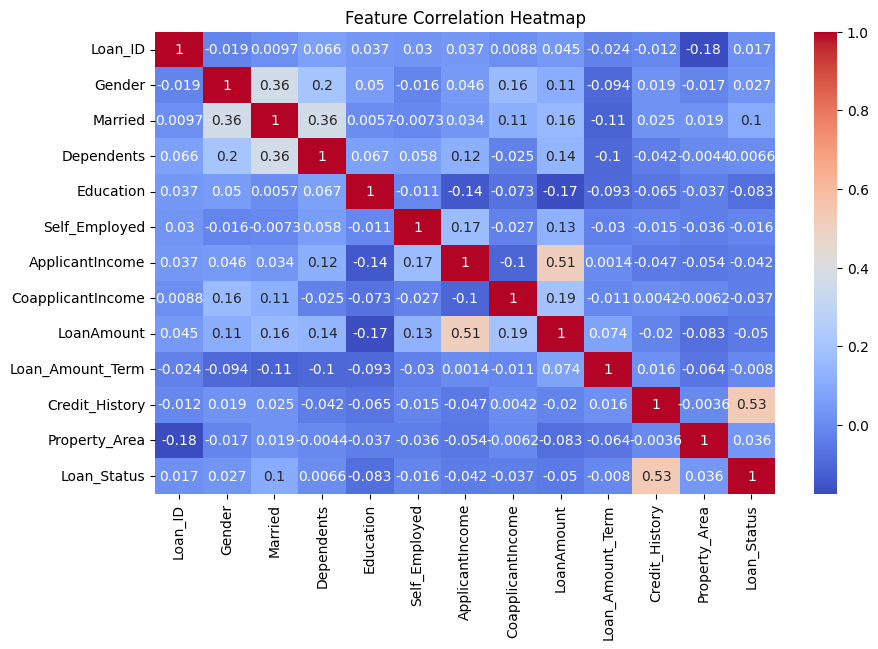

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


### **⚙️ Split dataset into training and testing sets.**

In [10]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data split done.")
print("Train size:", X_train.shape, "Test size:", X_test.shape)


✅ Data split done.
Train size: (443, 12) Test size: (111, 12)


### **🚀 Train Random Forest Classifier on training data.**

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("✅ Model trained successfully.")


✅ Model trained successfully.


### **📈 Evaluate model performance using accuracy and confusion matrix.**

Accuracy: 0.8378

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.47      0.62        32
           1       0.82      0.99      0.90        79

    accuracy                           0.84       111
   macro avg       0.88      0.73      0.76       111
weighted avg       0.85      0.84      0.82       111



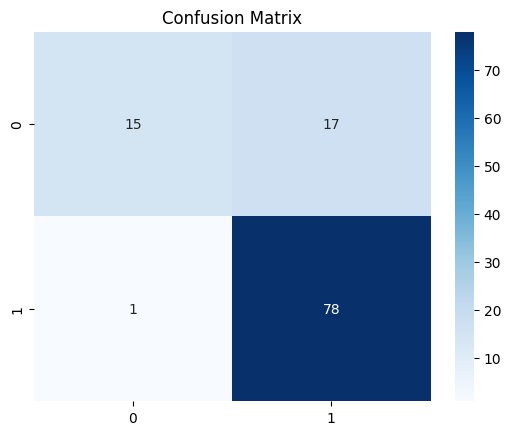

In [12]:
y_pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


### **🌟 Visualize most important features influencing predictions.**

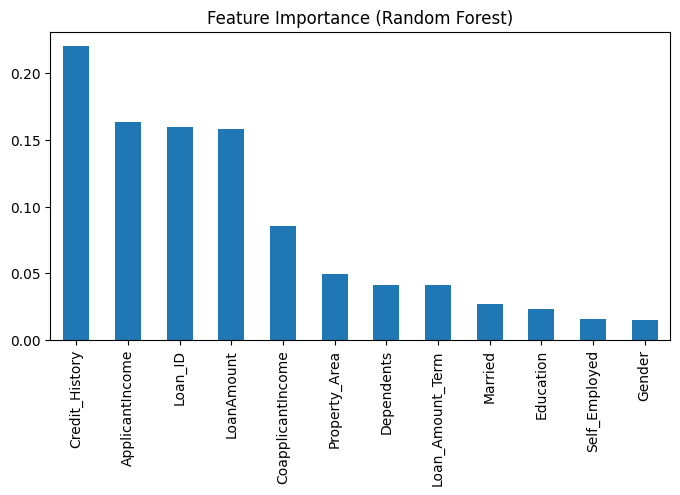

In [13]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=False).plot(kind='bar', figsize=(8,4))
plt.title("Feature Importance (Random Forest)")
plt.show()


### **💾 Save trained model for later use.**

In [14]:
joblib.dump(model, "loan_approval_model.pkl")
print("✅ Model saved as loan_approval_model.pkl")


✅ Model saved as loan_approval_model.pkl
